In [36]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [37]:
df = pd.read_csv("all_processed2.csv")
df.head(2)
df.columns.tolist()

['Unnamed: 0',
 'Unnamed: 0.1',
 'company',
 'location',
 'dates',
 'job-title',
 'summary',
 'pros',
 'cons',
 'advice-to-mgmt',
 'overall-ratings',
 'work-balance-stars',
 'culture-values-stars',
 'carrer-opportunities-stars',
 'comp-benefit-stars',
 'senior-mangemnet-stars',
 'helpful-count',
 'link',
 'summary_processed',
 'summary_char_length',
 'summary_word_count',
 'summary_stopword_count',
 'summary_stopword_freq',
 'pros_processed',
 'pros_char_length',
 'pros_word_count',
 'pros_stopword_count',
 'pros_stopword_freq',
 'cons_processed',
 'cons_char_length',
 'cons_word_count',
 'cons_stopword_count',
 'cons_stopword_freq',
 'text',
 'text_processed',
 'text_char_length',
 'text_word_count',
 'text_stopword_count',
 'text_stopword_freq']

### At this point there were still rows left with None or NaN values in summary, pros or cons. We went and removed these rows

In [38]:
df.count()[0]

67399

In [39]:
df = df[df["summary"].notna()]
df = df[df["pros"].notna()]
df = df[df["cons"].notna()]
df = df[df["overall-ratings"].notna()]

0 rows was removed.

In [40]:
df.count()[0]

67399

### In order to make it easier to work with the data we added a new column containing the text for summary, pros and cons.

In [41]:
df[["summary","pros","cons", "text"]].head(3)

summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   

                                                pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   

                                                cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   

                                                text  
0  Best Company to work for People are smart and ...  
1  Moving at the speed of light, burn out is inev...  
2  Great balance between big-company security and...

Mean text length in characters

In [42]:
np.mean(df["text"].str.len())

332.1738007982314

In [43]:
df["overall-ratings"].head()

0    5.0
1    4.0
2    5.0
3    5.0
4    5.0
Name: overall-ratings, dtype: float64

In [44]:
pd.set_option('display.max_colwidth', 200)
(df[df["overall-ratings"] == 5])[["summary", "pros", "cons"]].head(10)

summary  \
0                                                   Best Company to work for   
2   Great balance between big-company security and fun, fast-moving projects   
3                    The best place I've worked and also the most demanding.   
4                                            Unique, one of a kind dream job   
5                                        NICE working in GOOGLE as an INTERN   
6                                                          Software engineer   
7                                           great place to work and progress   
8                                    Google Surpasses Realistic Expectations   
9                                                   Execellent for engineers   
10                                                        Nice place to work   

                                                                                                                                                                                                       pros  \
0                                                                                                                                                                             People are smart and friendly   
2   * If you're a software engineer, you're among the kings of the hill at Google. It's an engineer-driven company without a doubt (that *is* changing, but it's still very engineer-focused). * The per...   
3   You can't find a more well-regarded company that actually deserves the hype it gets.  You'll work on cutting edge projects / solve important issues that impact your community and the world  You'll...   
4   Google is a world of its own. At every other company, there were lots of people who had serious gaps in their skills. At Google, I could have a serious work conversation about technology with ever...   
5                                                       People are not that busy, so they are nice to help our. They did make a suitable intern project that you can finish it in time and learn something.   
6                                                                                                                                                         Great working environment. Good work life balance   
7                                                                                                                                                                   work culture, benefits, growth, people,   
8   Great products. Vision you can feel good about. Fair compensation. Automonomy in your role. Wide array of industries / roles employees are able to explore. Feedback loops give employees that abili...   
9                                                                                                                                                                    Impact driven. Best tech in the world.   
10                                                                                                                    * Smart people * World class infrastructure * Diverse selection of projects and teams   

                                                                                                                                                                                                       cons  
0                                                                                                                                                                        Bureaucracy is slowing things down  
2   * It *is* becoming larger, and with it comes growing pains: bureaucracy, slow to respond to market threats, bloated teams, cross-divisional tension (though nothing remotely approaching that of Mic...  
3   I live in SF so the commute can take between 1.5 hours to 1.75 hours each way on the shuttle - sometimes 2 hours each way on a busy day or rainy day. That means being on the bus for 3-4 hours PER ...  
4   If you don't work in MTV (HQ), you will be given work. However if you are passiona

In [45]:
(df[df["overall-ratings"] == 4])[["summary", "pros", "cons"]].head(10)

summary  \
1   Moving at the speed of light, burn out is inevitable   
32                  Google is still the best place to be   
35                              Senior Software Engineer   
36                                     Good compensation   
39                                               Manager   
46                                            Its Google   
47                                                     g   
50                                            cs analyst   
55                              Senior Software Engineer   
57                                            good place   

                                                                                                                                                                                                       pros  \
1   1) Food, food, food. 15+ cafes on main campus (MTV) alone. Mini-kitchens, snacks, drinks, free breakfast/lunch/dinner, all day, errr'day.  2) Benefits/perks. Free 24:7 gym access (on MTV campus). ...   
32                                                          Great place to work, learn new things, grow and innovate. Able to maintain a respectful and healthy workplace culture despite the recent press.   
35                                                                                                                                                                               Good work and life balance   
36                                                                                                                                                 Better than average engineers. Competitive compensation.   
39                                                                                                                                                                           Easy place and people are nice   
46                                                                                                                                                    food, shuttle, technology, perks, health, 401K, brand   
47                                                                                                                                                                     perks are pretty good, as is culture   
50                                                                                                                                                                   great work culture , good for starters   
55                                               Brilliant people, tons of awesome technical infrastructure, focus on technical excellence, great ability to move between projects and become well-rounded.   
57                                                                                                                                                          comfortable environment, free food, nice people   

                                                                                                                                                                                                       cons  
1   1) Work/life balance. What balance? All those perks and benefits are an illusion. They keep you at work and they help you to be more productive. I've never met anybody at Google who actually time ...  
32                                                                                                                              Large company issues have crept up but nothing compared to other behemoths.  
35                                                                                                                                                              Growth of salaries and career opportunities  
36                                                                                                                                               Big and beurocratic. Lots of legacy systems. Moves slowly.  
39                                                                              

In [46]:
(df[df["overall-ratings"] == 3])[["summary", "pros", "cons"]].head(10)

summary  \
30                                               Senior Director   
37                            Great perks, bad work-life balance   
41                                                      Big Tech   
48                                                           meh   
61                                                   not too bad   
66                                                      Engineer   
83   Great perks, interesting colleagues, zero work/life balance   
92                       Administrative Business Partner - Sales   
108                             Average with a hint of arrogance   
119                                                      Analyst   

                                                                                                                                                                                                        pros  \
30   So many brilliant people Tons of resources Working on amazingly cool technologies Great culture - they really care about employees, actively ask for feedback, and act on it (e.g. Set corporate OKR...   
37                        Google’s perks are great: free food, shuttle to work, stock options, fun offices and amenities. The company is also full of really smart people that I’m constantly learning from.   
41                                                                                                                                                                            Never have to skip a paycheck.   
48                                                                                                                                                           Pays really well Free food Looks good on resume   
61                                                                                                                                                                         nice food，nice place ，nice people   
66                                                                                                                                                          salary was fine but in line with other companies   
83       -Amazing Perks in NYC: gym, rooftop terrace, unlimited food and snacks for breakfast lunch dinner, beautiful spaces -Brand notoriety -working with smart people -lots of resources available to you   
92                                                                                                                                             Fantastic benefits. It's great to have Google on your resume.   
108                                                                                                                           Lots of interesting projects to learn from, great place for a junior engineer.   
119                                                                                                                                                                Good company culture and work environment   

                                                                                                                                                                                                        cons  
30                                                                                                  Becoming highly bureaucratic Growing political back stabbing, especially at the senior management levels  
37   I have zero work-life balance. I work minimum 50 hours per week, often including nights and weekends. The commute is absolutely horrendous. I’m also not a fan of the performance review structure (...  
41                                                                                                                              Google has an over abundance of technicians and under-abundance of thinkers.  
48   Google wants 60-hour weeks. If you have a 150 IQ, Google is okay with 50-hour weeks, otherwise, 60-hour weeks are required to keep your job. Work is mind-numbingly boring, e.g. sustainin

In [47]:
(df[df["overall-ratings"] == 2])[["summary", "pros", "cons"]].head(10)

summary  \
54                       Depends on what you're looking for   
90                       China Search Project is Concerning   
142               Fun perks - wouldn’t contract there again   
147                 Was ok to work there but not fast paced   
183                                                     Meh   
221  A company culture build around the millenial sterotype   
357                                            Google Cloud   
379                                         Account Manager   
382             Google is great, recruiting org not so much   
384                                      Okay place to work   

                                                                                                                                                    pros  \
54                                       For the right people it can be a great place. Good compensation, free food, massages, relaxed work environment.   
90                                                                                                 Intellectually stimulating place with many "benefits"   
142                                                                                        Perks were great, as well as being around intelligent people.   
147                                                                   great food offered but quality went down a bit with time as employee count went up   
183                                                                                                                   Good pay, benefits, and free food.   
221                                                                                                                   Cost or budget is never a concern.   
357                                                                Access to the larger Google culture and benefits -- gyms, food, campus benefits, etc.   
379  benefits: free breakfast, lunch, gym + classes, dogs in the office, work from home or other offices, foot in the door to get Google on your resume.   
382                                  Free food Google campus atmosphere Bright, friendly colleagues (when you aren’t working directly with them!) Salary   
384                                                                                                                               The pay is pretty good   

                                                                                                                                                                                                        cons  
54   Projects can be boring or useless. Work may not be appreciated. Performance evaluation can be random. Colleges can be very nerdy and may never talk to you. SWEs may treat you like second-class cit...  
90                                                                                                                                                       I think the culture has lost its way. It's a shame.  
142                                                                                                    Being a contractor I didn’t recrive a lot of responsibility or work. I felt very unused & undervalued  
147                                                                                                                                  pace of work is slow and have too many hires for a small piece of work.  
183                                                                                                                                                   Spend more time sending emails than doing actual work.  
221  The company culture is like a millennial personified--by lunch on the first day I was already annoyed by the exceedingly in-your-face liberal political culture. Evals and promotions are based on t...  
357  I hear from people around the company that Google proper is great and that Cloud is not representative of the true Google work experience. Either way, Cloud is pretty terrible. Extremely 

In [48]:
(df[df["overall-ratings"] == 1])[["summary", "pros", "cons"]].head(10)

summary  \
100                                        pockets of incompetence   
122                                       WTF are they even doing?   
149                                       Google is racist company   
186                            CEO who doesn't listen to employees   
226                     Great from afar, dysfunctional from within   
235                    Director of Developmental Sales & Marketing   
274                                 Playstore Production Associate   
306  Company full of people running around caring only about promo   
312                                              software engineer   
319                                       Overpaid but undervalued   

                                                                                                                                                                                                        pros  \
100                                                                           Overall, Google pays well and showers people with perks. There are pockets of excellence. The company is extremely profitable.   
122                                                                                                                    Pay was excellent. Perks were great. Office was awesome. Lunch was usually delicious.   
149                                                                                                                                                                   O you have got to be kidding me.......   
186                                                                                                                                                            -Free food (snacks and cafes) -Massage chairs   
226  There are pros to working at Google - it looks great on the resume because of its history, it is a known quantity in the industry, performers get a lot of stock, it's not yet an antiquated giant (...   
235                                                                                                                                 Possibly a growth company but financial problems create much uncertainty   
274                                                                This team has the potential to be best they can be but they need to get out of their own way with their egotistical know it all attitude.   
306                                                                                                                                                                                Free food and a nice gym.   
312                                                                                                                                   perks and utility works just fine, if you like the free food and stuff   
319                                                                                                                                   Google pays very well, only to be beat by Facebook (or so I've heard).   

                                                                                                                                                                                                        cons  
100  There are deep, deep pockets of dysfunction and incompetence at Google. Do your due diligence on the team and manager you're considering joining. There are bozos at every company, and Google is no...  
122  -I started just before a big reorg. I had 9 different managers in 7 months. Each had a drastically different goal for me to achieve.  -No real vision toward anything groundbreaking in terms of the...  
149                                                                                                                                                           Is ran by a pack of 12 years old kids.........  
186                                                                                                                                  -Hard to get promoted -Poor planning o

In [49]:
pd.set_option('display.max_colwidth', 50)

### We needed a binary label to be able to predict whether a review was positive or negative. We decided to define positive reviews as a 4-star rating or leaving the rest as negative.

In [50]:
df["label"] = df.apply(lambda row: 1 if row["overall-ratings"] >= 4 else 0, axis=1)

In [51]:
df_pos = df[df["label"] == 1]
df_neg = df[df["label"] == 0]
print("Positive: {0}, Negative: {1}".format(
        df_pos.count()[0], df_neg.count()[0])
     )

Positive: 45607, Negative: 21792


In [52]:
from sklearn.utils import resample

In [53]:
df_pos_res = resample(df_pos, 
                   n_samples=df_neg.count()[0], 
                   random_state=23)

In [54]:
df_pos_res.count()[0]

21792

In [55]:
df = df_neg.append(df_pos_res)

In [56]:
from wordcloud import WordCloud

def print_word_cloud(text_col, stopwords):
    
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black',
        stopwords = stopwords).generate(str(text_col))

    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')

    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

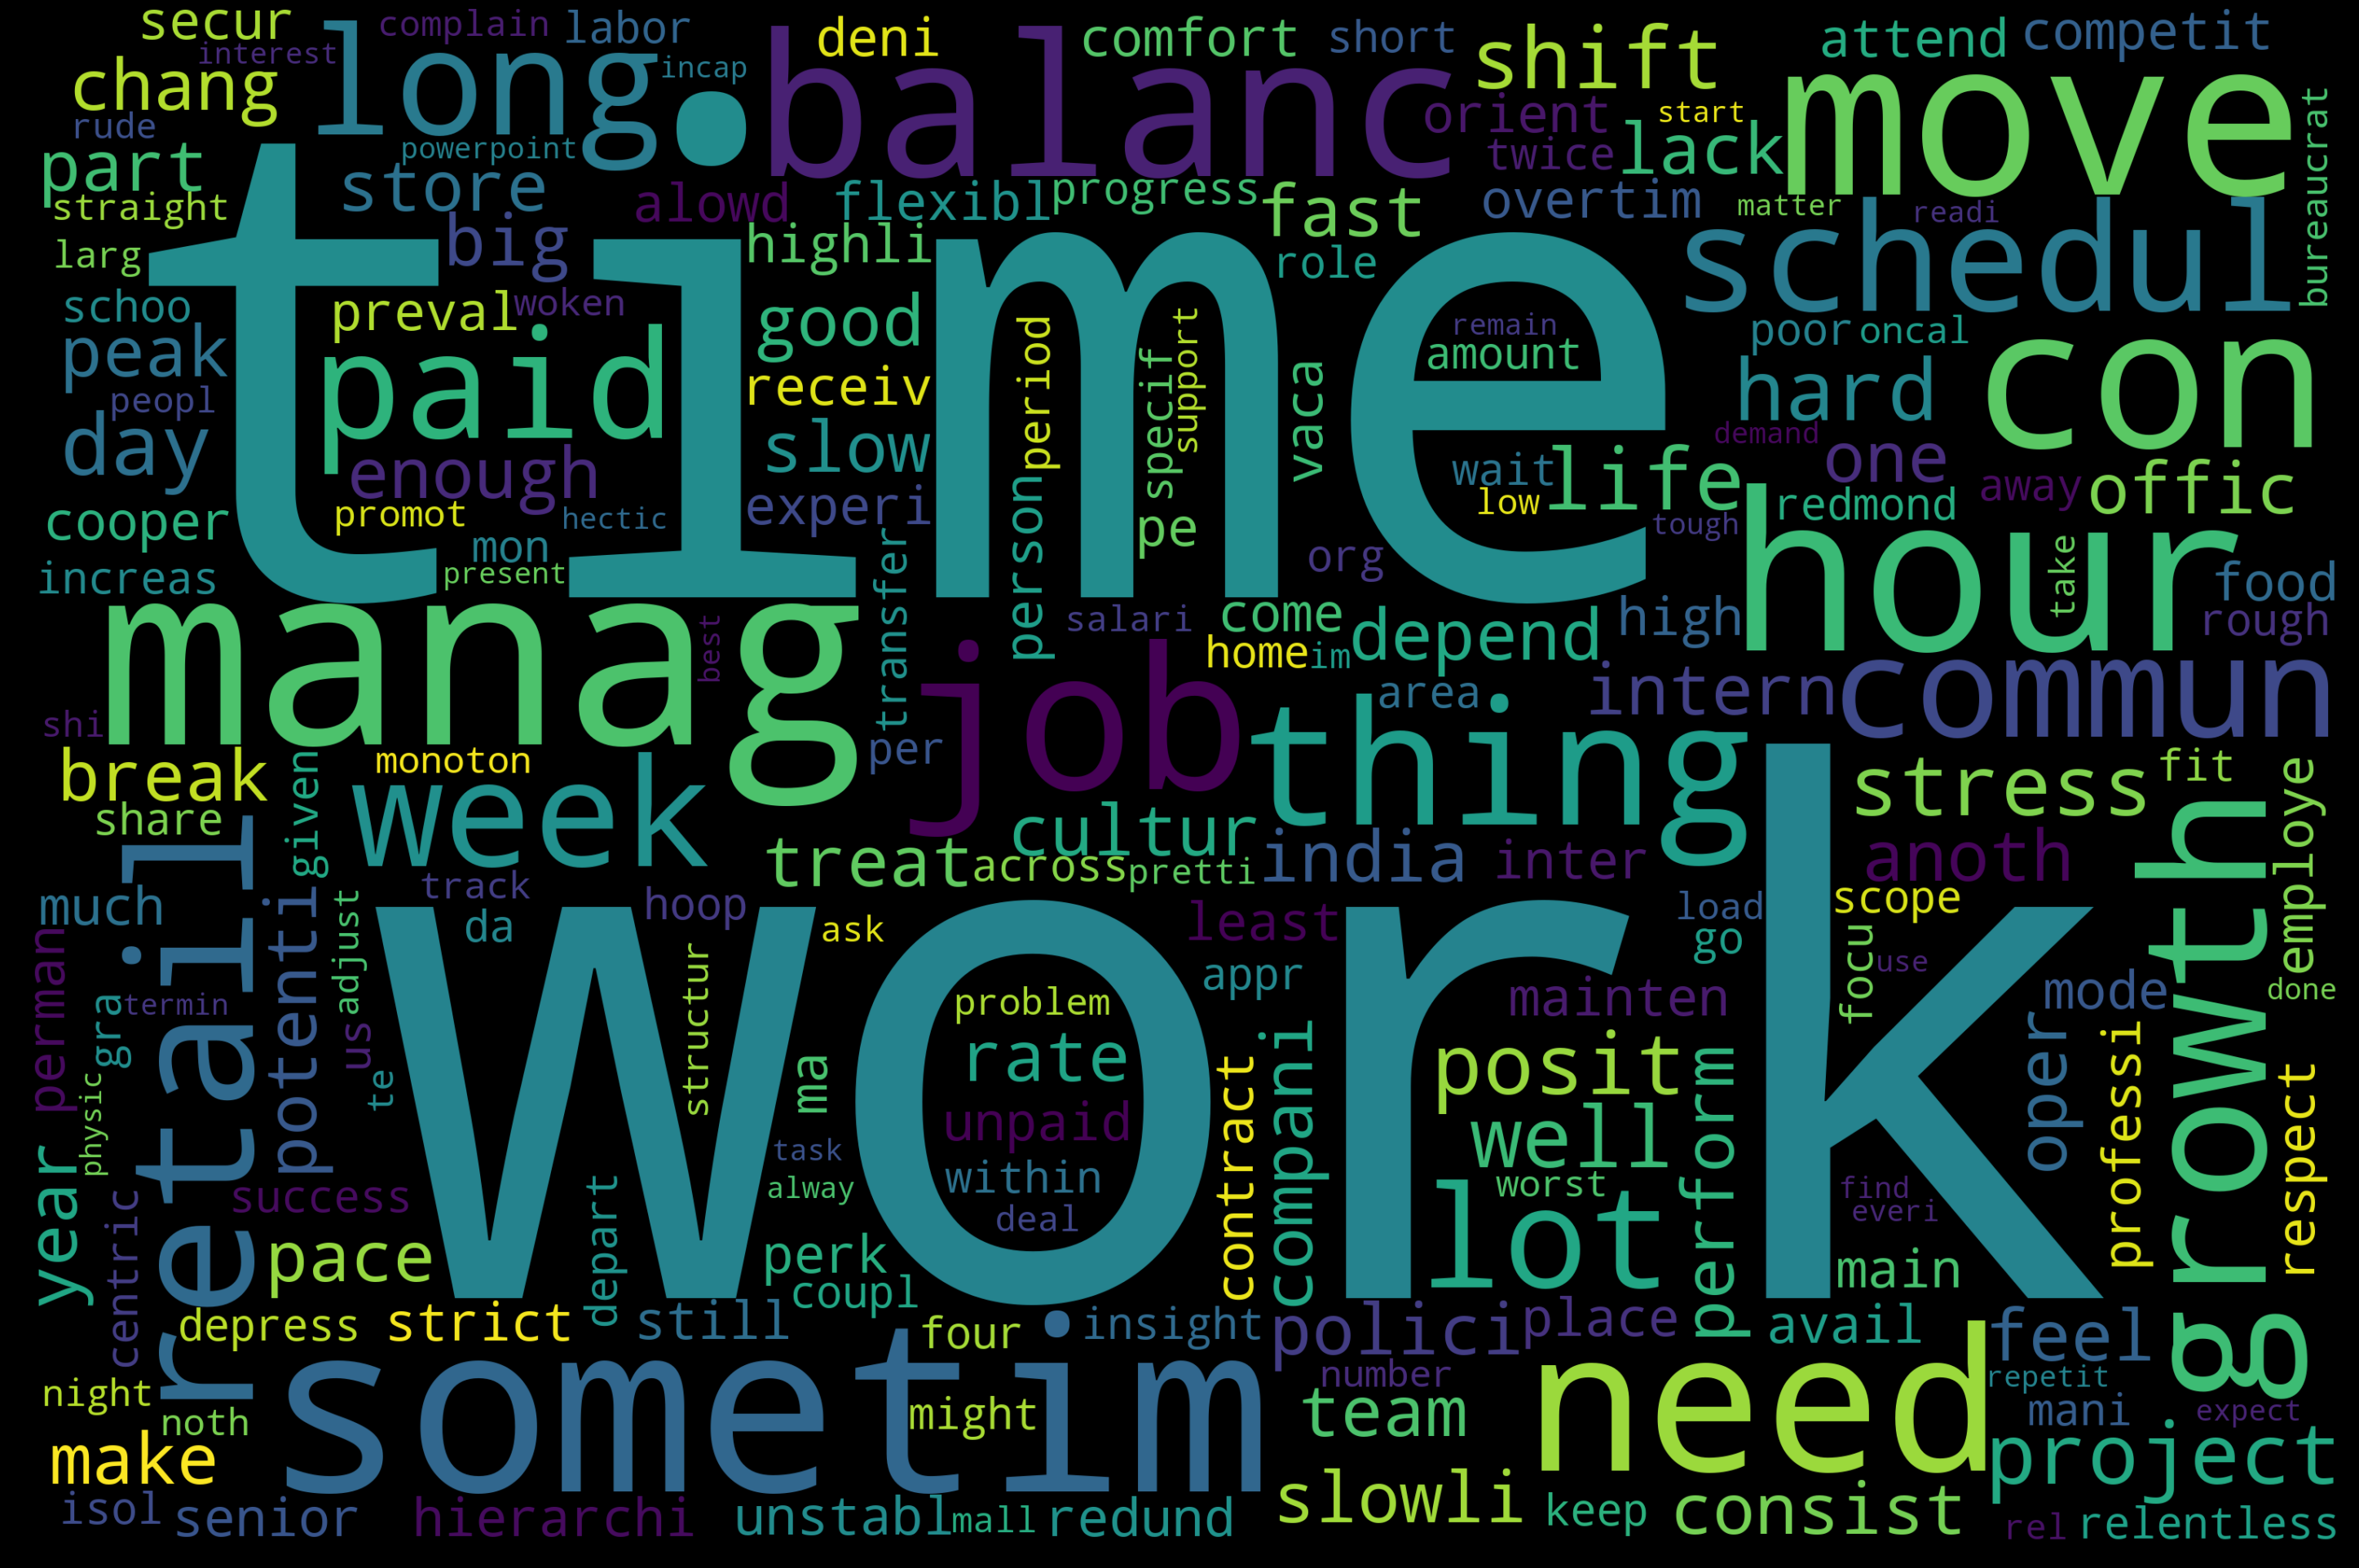

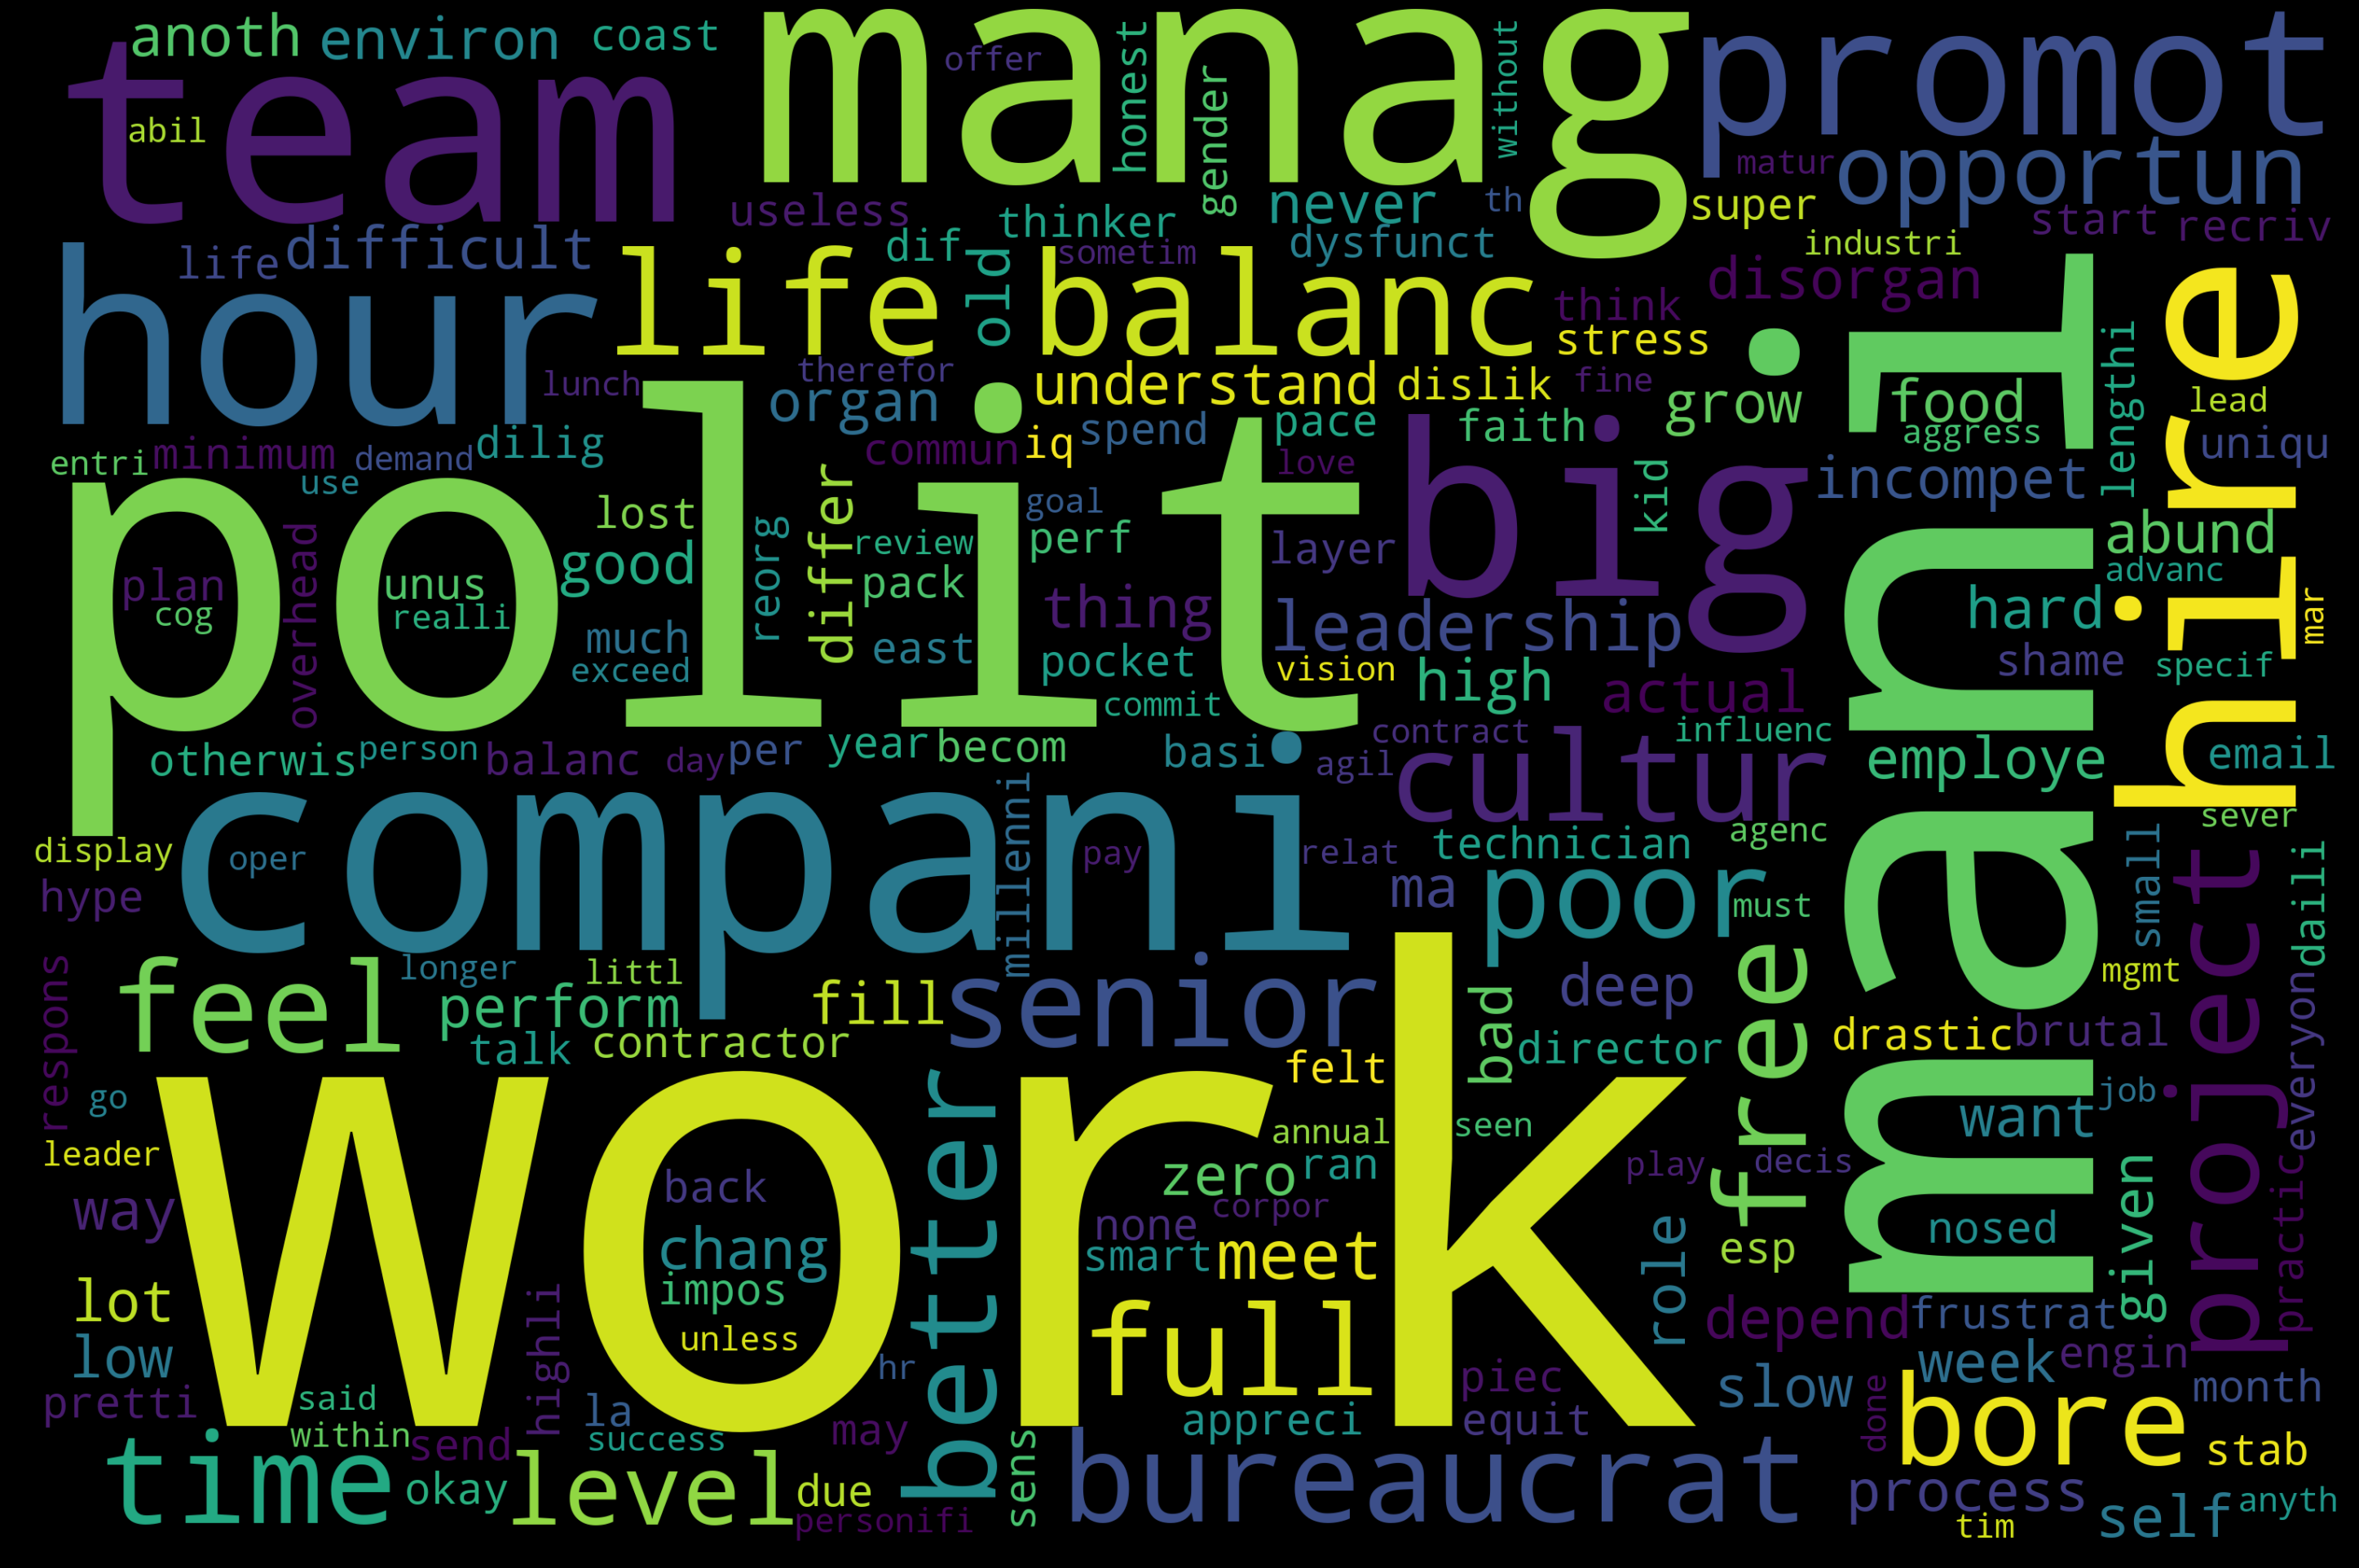

In [71]:
stopwords = ["work"]

text_pos = df_pos_res["cons_processed"]
print_word_cloud(text_pos, stopwords)

text_neg = df_neg["cons_processed"]
print_word_cloud(text_neg, stopwords)

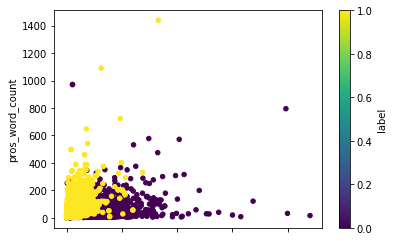

In [59]:
ax2 = df.plot.scatter(x='cons_word_count',
                       y='pros_word_count',
                       c='label',
                       colormap='viridis')

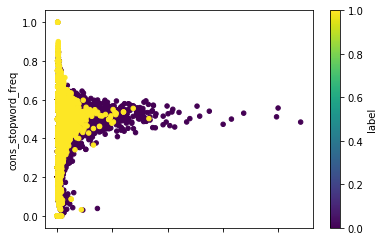

In [60]:
ax2 = df.plot.scatter(x='cons_word_count',
                       y='cons_stopword_freq',
                       c='label',
                       colormap='viridis')

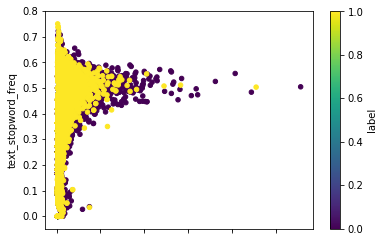

In [61]:
ax2 = df.plot.scatter(x='text_word_count',
                       y='text_stopword_freq',
                       c='label',
                       colormap='viridis')

In [62]:
import seaborn as sns

df2_index = ["pros_word_count", "pros_stopword_freq", "pros_stopword_count", "pros_char_length"]
df2_index.extend(["cons_word_count", "cons_stopword_freq", "cons_stopword_count", "cons_char_length"])
df2_index.extend(["summary_word_count", "summary_stopword_freq", "summary_stopword_count", "summary_char_length"])
df2_index.extend(["text_word_count", "text_stopword_freq", "text_stopword_count", "text_char_length"])
df2_index.extend(["label"])

'''
df2_index = ["pros_word_count", "pros_stopword_freq"]
df2_index.extend(["cons_word_count", "cons_stopword_freq"])
df2_index.extend(["summary_word_count", "summary_stopword_freq"])
df2_index.extend(["label"])
'''

df2_index = ["pros_word_count", "pros_stopword_freq", "pros_char_length"]
df2_index.extend(["cons_word_count", "cons_stopword_freq", "cons_char_length"])
df2_index.extend(["summary_word_count", "summary_stopword_freq", "summary_char_length"])
df2_index.extend(["label"])


df2 = df[df2_index]
#df2 = df2[:1000]

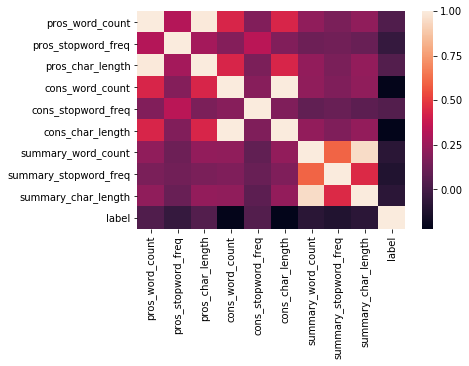

In [63]:
sns.heatmap(df2.corr())

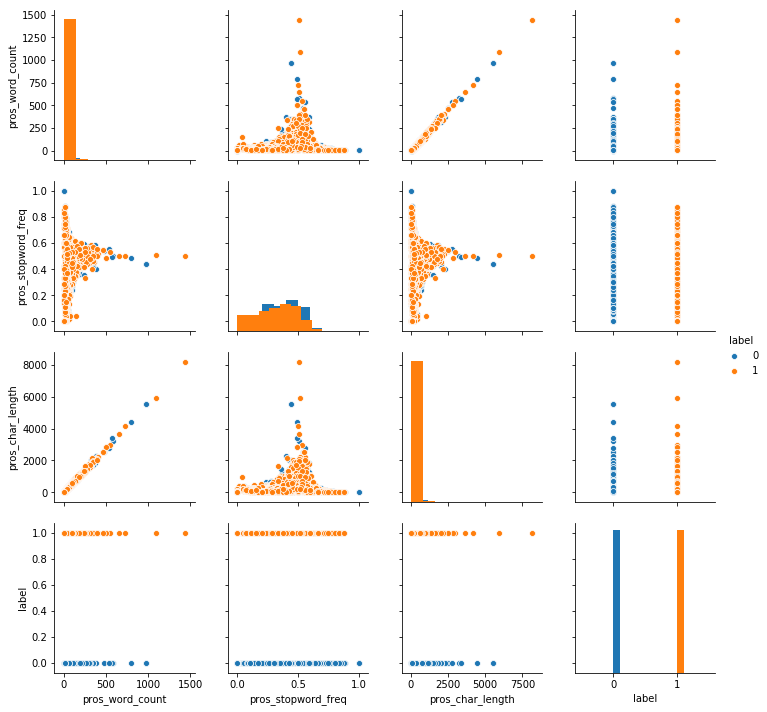

In [64]:
plot_index = ["pros_word_count", "pros_stopword_freq", "pros_char_length", "label"]
sns.pairplot(df2[plot_index], hue="label", diag_kind="hist")

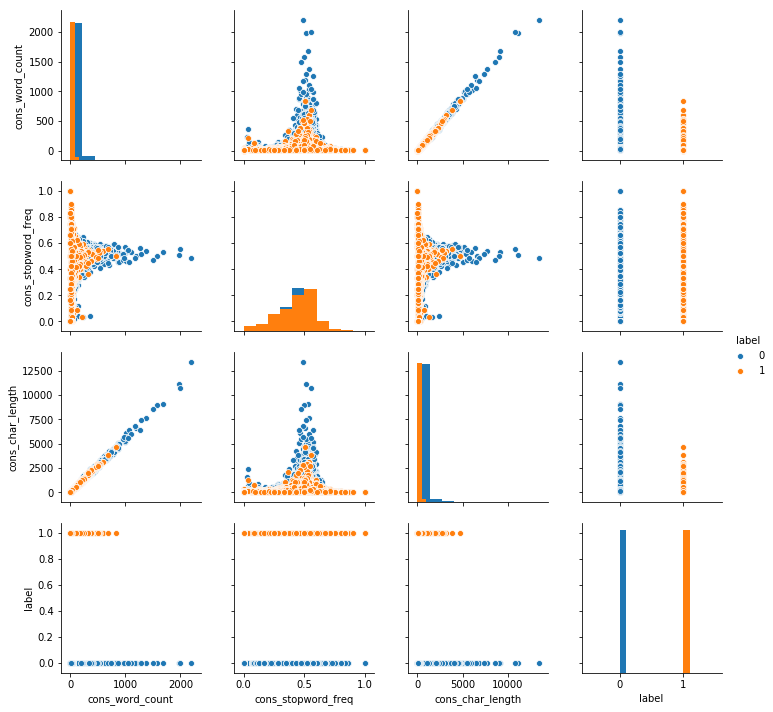

In [65]:
plot_index = ["cons_word_count", "cons_stopword_freq", "cons_char_length", "label"]
sns.pairplot(df2[plot_index], hue="label", diag_kind="hist")

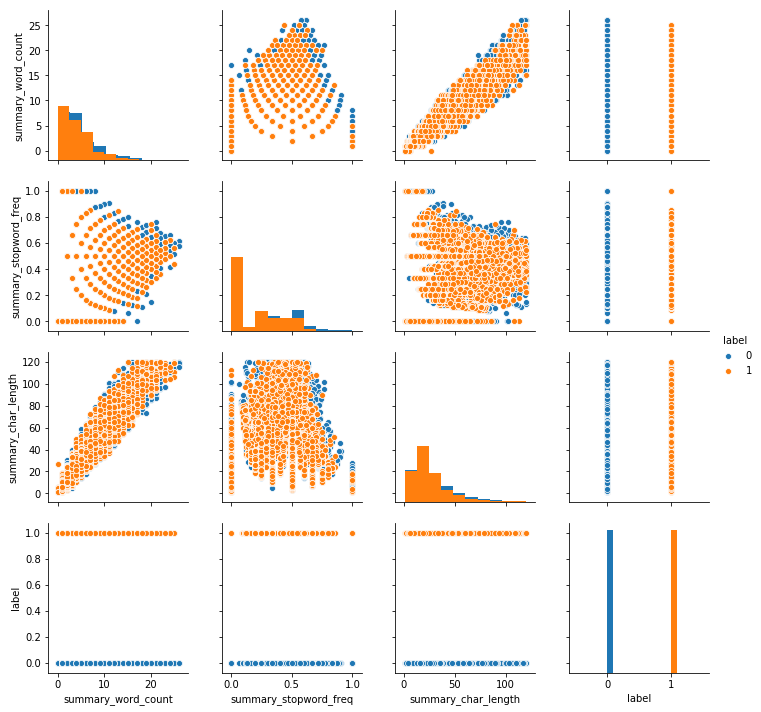

In [66]:
plot_index = ["summary_word_count", "summary_stopword_freq", "summary_char_length", "label"]
sns.pairplot(df2[plot_index], hue="label", diag_kind="hist")

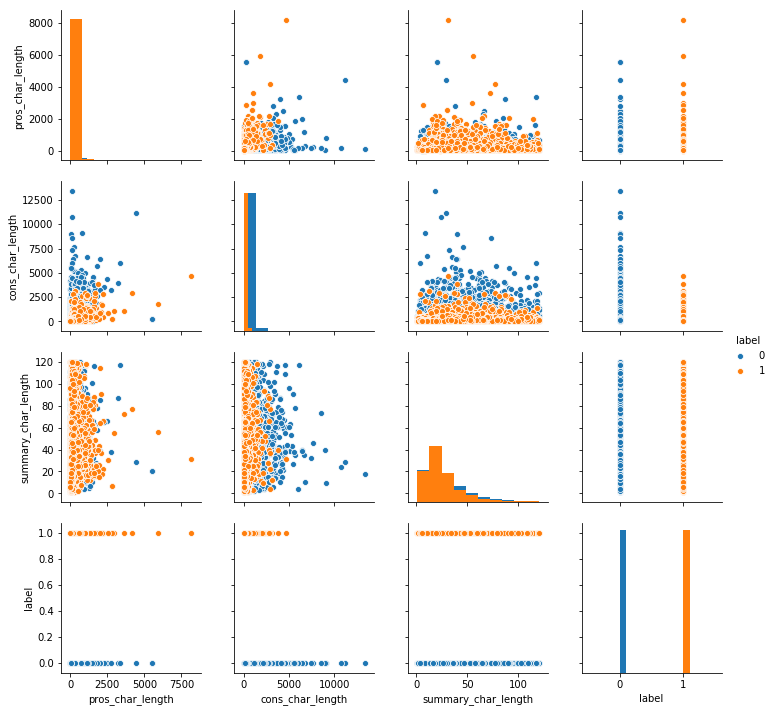

In [67]:
plot_index = ["pros_char_length", "cons_char_length", "summary_char_length", "label"]
sns.pairplot(df2[plot_index], hue="label", diag_kind="hist")

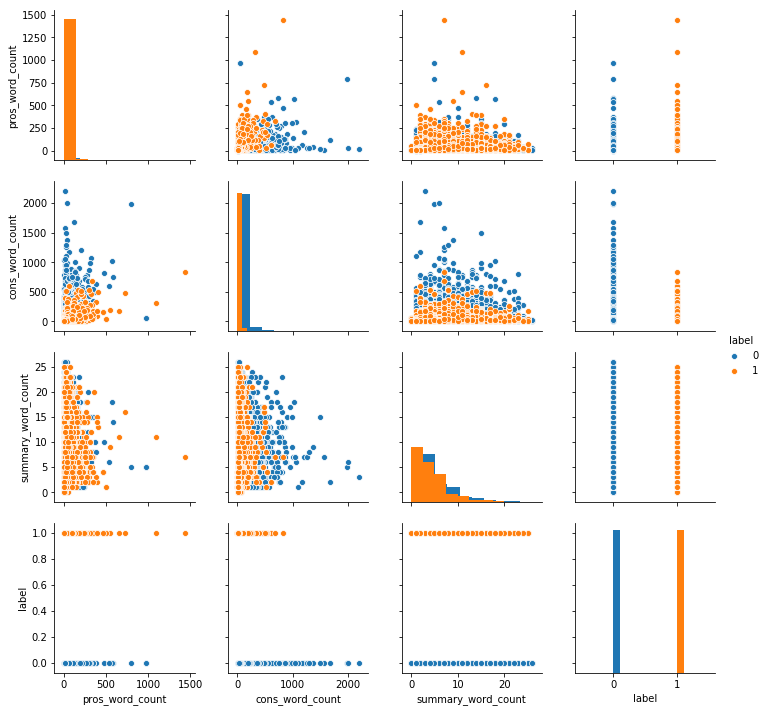

In [68]:
plot_index = ["pros_word_count", "cons_word_count", "summary_word_count", "label"]
sns.pairplot(df2[plot_index], hue="label", diag_kind="hist")

In [20]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

y = df2["label"]
X = df2.drop(["label"], axis=1)

kf = KFold(n_splits=10, shuffle=True, random_state=4)
def do_cross_val(model):
    acc_score = cross_val_score(model, X, y, cv=kf)
    print(acc_score)
    print(np.mean(acc_score))

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

pipe_knn = make_pipeline(StandardScaler(with_mean=False), KNeighborsClassifier(n_neighbors=10))
acc = do_cross_val(pipe_knn)

[0.71795252 0.72017804 0.72329377 0.72596439 0.72299703 0.71691395
 0.73293769 0.71632047 0.71750742 0.71331058]
0.7207375862103887


In [22]:
from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(random_state=21, solver='liblinear', C=1))
do_cross_val(pipe_lr)

[0.74376855 0.74362018 0.74940653 0.74643917 0.74391691 0.74792285
 0.76246291 0.74970326 0.73991098 0.73408518]
0.7461236511153686


In [23]:
from sklearn.tree import DecisionTreeClassifier

pipe_dt = make_pipeline(StandardScaler(with_mean=False), DecisionTreeClassifier(max_depth=45, random_state=21))
do_cross_val(pipe_dt)

[0.66083086 0.65697329 0.6620178  0.65919881 0.65237389 0.6648368
 0.66543027 0.66350148 0.65459941 0.6627096 ]
0.6602472212106948


In [24]:
from sklearn.naive_bayes import GaussianNB

pipe_nb = make_pipeline(StandardScaler(with_mean=False), GaussianNB())
do_cross_val(pipe_nb)

[0.70652819 0.71083086 0.71454006 0.70964392 0.70400593 0.71261128
 0.72195846 0.71320475 0.70326409 0.69550378]
0.7092091321036194


In [ ]:
from sklearn.svm import SVC

pipe_svm = make_pipeline(StandardScaler(with_mean=False), SVC(C=.1, random_state=21, kernel="poly", gamma="auto"))
do_cross_val(pipe_svm)

In [ ]:
prev

### Now with the label column we can see that the dataset is quite unbalanced

In [25]:
df_pos = df[df["label"] == 1]
df_neg = df[df["label"] == 0]
print("Positive: {0}, Negative: {1}".format(df_pos.count()[0], df_neg.count()[0]))

Positive: 45607, Negative: 21792


### We did a resampling in order to balance out the dataset

In [26]:
from sklearn.utils import resample

In [27]:
df_pos_res = resample(df_pos, 
                   n_samples=df_neg.count()[0], 
                   random_state=23)

In [28]:
df_pos_res.count()[0]

21792

In [29]:
df = df_neg.append(df_pos_res)

In [30]:
y = df["label"]

### We used the TfidVectorizer from sci-kit learn to transform the strings into word vectors. We chose to only vectorize the 3000 most common words for simplicity sake.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
no_of_words = 3000
tfidf = TfidfVectorizer(max_features=no_of_words, ngram_range=(1,2))

In [46]:
X = tfidf.fit_transform(df["text"].tolist())
X.shape

(43584, 3000)

### We devided the data into training and testing data

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=22)

### In order to reduce the dimensionality of the input data we created an autoencoder

In [48]:
import keras.layers as layers
import keras.models as models

encoding_dim = 32

input_layer = layers.Input(shape=(no_of_words,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(no_of_words, activation='sigmoid')(encoded)

In [49]:
autoencoder = models.Model(input_layer, decoded)

In [50]:
encoder = models.Model(input_layer, encoded)

In [51]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [52]:
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True)

Epoch 1/10
34867/34867 [==============================] - 5s 148us/step - loss: 0.6876
Epoch 2/10
34867/34867 [==============================] - 5s 140us/step - loss: 0.6763
Epoch 3/10
34867/34867 [==============================] - 5s 144us/step - loss: 0.6627
Epoch 4/10
34867/34867 [==============================] - 5s 143us/step - loss: 0.6266
Epoch 5/10
34867/34867 [==============================] - 5s 133us/step - loss: 0.4686
Epoch 6/10
34867/34867 [==============================] - 5s 131us/step - loss: 0.2033
Epoch 7/10
34867/34867 [==============================] - 5s 132us/step - loss: 0.0814
Epoch 8/10
34867/34867 [==============================] - 5s 133us/step - loss: 0.0456
Epoch 9/10
34867/34867 [==============================] - 5s 133us/step - loss: 0.0321
Epoch 10/10
34867/34867 [==============================] - 5s 133us/step - loss: 0.0256


In [53]:
X_train_encoded = encoder.predict(X_train)
X_train_encoded.shape

(34867, 32)

In [54]:
type(X_train_encoded)

numpy.ndarray

In [55]:
y_train.shape

(34867,)

### We created a function to easily run cross_val_score on the model with the correct data and print out the results

In [56]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=4)
def do_cross_val(model):
    acc_score = cross_val_score(model, X_train_encoded, y_train, cv=kf)
    print(acc_score)
    print(np.mean(acc_score))

### We ran with various different models trying to tweak the settings for best result

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

pipe_knn = make_pipeline(StandardScaler(with_mean=False), KNeighborsClassifier(n_neighbors=10))
do_cross_val(pipe_knn)

[0.56438199 0.55176369 0.55233725 0.54946946 0.54172641 0.547462
 0.55348437 0.55651176 0.55507745 0.54618474]
0.5518399132191842


In [58]:
from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(random_state=21, solver='liblinear', C=1))
do_cross_val(pipe_lr)

[0.56868368 0.56237453 0.57556639 0.57527961 0.56352165 0.57527961
 0.56438199 0.57056799 0.56110155 0.58175559]
0.5698512596825089


In [59]:
from sklearn.tree import DecisionTreeClassifier

pipe_dt = make_pipeline(StandardScaler(with_mean=False), DecisionTreeClassifier(max_depth=45, random_state=21))
do_cross_val(pipe_dt)

[0.59506739 0.60137654 0.60825925 0.59994264 0.59277316 0.60854603
 0.59305994 0.58146873 0.59781985 0.60126219]
0.5979575724340271


In [60]:
from sklearn.naive_bayes import GaussianNB

pipe_nb = make_pipeline(StandardScaler(with_mean=False), GaussianNB())
do_cross_val(pipe_nb)

[0.55463149 0.54115285 0.53943218 0.55061658 0.54344709 0.53541726
 0.55291081 0.55077453 0.53815261 0.55077453]
0.5457309923046686


In [ ]:
acc_score = cross_val_score(pipe_nb, X_train.toarray(), y_train, cv=kf)
print(acc_score)
print(np.mean(acc_score))

Since the SVM classifier was very slow at training the data we trained on only 1000 samples so we could easily tweak the settings and retrain the model

In [ ]:
Xs = encoder.predict(X_test[:1000])
ys = y_test[:1000]

In [ ]:
from sklearn.svm import SVC

pipe_svm = make_pipeline(StandardScaler(with_mean=False), SVC(C=.1, random_state=21, kernel="rbf", gamma="auto"))
acc_score = cross_val_score(pipe_svm, Xs, ys, cv=kf)
print(acc_score)
print(np.mean(acc_score))

Of all of the ML models we used the D-Tree seemed to perform the best with an accuracy of almost 60%

## Conclusion

Did we manage to create a model that could answer the business question? With 60%-ish accuracy, yes.
The accuracy of the model is not utterly impressive. We might be able to improve the predictions by using a neural network but that will be for some other time.
However we learned a lot about Natural Language Processing and we think we will be able to do better in the future.